In [1]:
# 분류 DNN 모델 구현 ########################
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(0.05))
        
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dropout(0.2))
        
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

        
# 데이터 준비 ##############################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)


# 학습 효과 분석 ##############################
from ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt


# 분류 DNN 학습 및 테스팅 ####################
def main():
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Nout)
    history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Using TensorFlow backend.


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s - loss: 2.0152 - acc: 0.2598 - val_loss: 1.8963 - val_acc: 0.3170
Epoch 2/100
40000/40000 [==============================] - 3s - loss: 1.8638 - acc: 0.3271 - val_loss: 1.7833 - val_acc: 0.3634
Epoch 3/100
40000/40000 [==============================] - 3s - loss: 1.7959 - acc: 0.3534 - val_loss: 1.7472 - val_acc: 0.3782
Epoch 4/100
40000/40000 [==============================] - 3s - loss: 1.7590 - acc: 0.3667 - val_loss: 1.6917 - val_acc: 0.3932
Epoch 5/100
40000/40000 [==============================] - 3s - loss: 1.7310 - acc: 0.3763 - val_loss: 1.7360 - val_acc: 0.3830
Epoch 6/100
40000/40000 [==============================] - 3s - loss: 1.7010 - acc: 0.3871 - val_loss: 1.6557 - val_acc: 0.4092
Epoch 7/100
40000/40000 [==============================] - 3s - loss: 1.6886 - acc: 0.3938 - val_loss: 1.6319 - val_acc: 0.4151
Epoch 8/100
40000/40000 [=============================

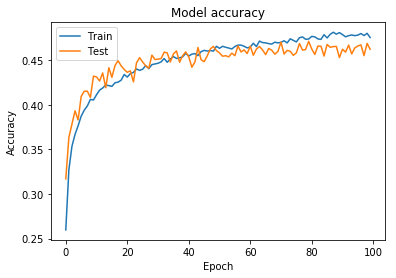

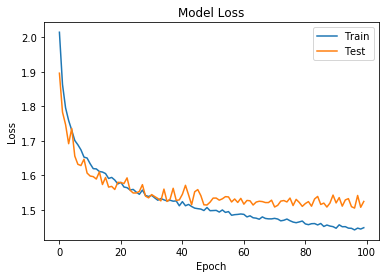

In [2]:
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

(X_train, Y_train), (X_test, Y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Nout)
history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()